In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
df.shape

(891, 12)

In [12]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['Embarked']

In [13]:
df[cols].sample(5)

,Embarked
546,S
32,Q
645,C
627,S
159,S


In [14]:
len(df[cols].dropna())/len(df)

0.9977553310886644

In [15]:
new_df = df[cols].dropna()

df.shape , new_df.shape

((891, 12), (889, 1))

In [18]:
new_df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [26]:
df[cols].value_counts()

Embarked
S           644
C           168
Q            77
Name: count, dtype: int64

In [21]:
new_df.value_counts()

Embarked
S           644
C           168
Q            77
Name: count, dtype: int64

In [28]:
temp = pd.concat([
    df[cols].value_counts()/len(df),
    new_df[cols].value_counts()/len(new_df)
] , axis = 1)

In [29]:
temp.columns = ["original" , 'cca']

In [30]:
temp

,original,cca
Embarked,,
S,0.722783,0.724409
C,0.188552,0.188976
Q,0.086420,0.086614


In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: ylabel='Density'>

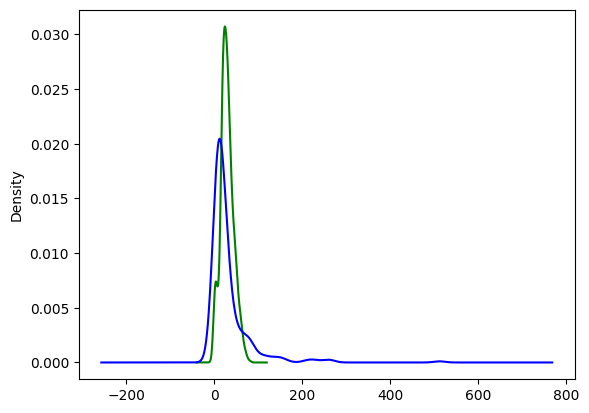

In [35]:
df.Age.plot(kind = "kde" , color = "green")
df.Fare.plot(kind = "kde" , color = "blue")

<Axes: xlabel='Embarked'>

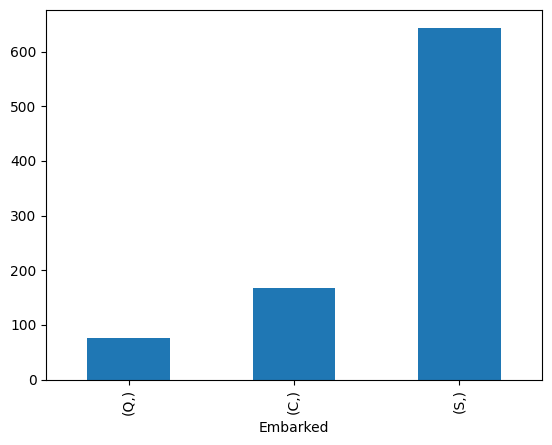

In [39]:
df[cols].value_counts().sort_values(ascending=True).plot.bar()

In [40]:
df[cols].mode()

,Embarked
0,S


<Axes: ylabel='Density'>

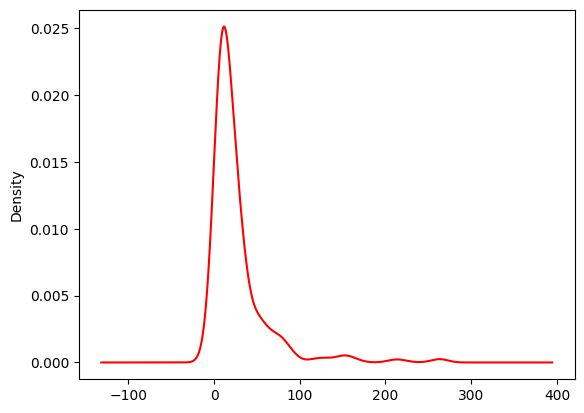

In [43]:
df[df["Embarked"] == "S"]["Fare"].plot(kind="kde", color="red")
